# Deel I. Machine learning

## Hoofdstuk 1. Het perceptron

1. [Inleiding](#Inleiding)
2. [Het perceptron](#Het_perceptron)
3. [Lineaire regressie](#Lineaire_regressie)

### <a id='Inleiding'>Inleiding</a>

Dit is het Jupyter Notebook behorende bij hoofdstuk 1 van het vak *Advanced Datamining* (BFVH4DMN2). Op BlackBoard tref je eveneens een module `data.py` aan die diverse functies bevat die helpen bij het genereren en het visualiseren van de gebruikte datasets. Creeër daarnaast een bestand `model.py` in een code-editor naar keuze en sla al deze bestanden gezamenlijk op in één werkmap. 

<div class="alert alert-info">**Opmerking:**<br />Op BlackBoard tref je ook een `*.html` versie van dit notebook aan met daarin de evaluaties van alle onderstaande code. Gebruik deze zonodig als voorbeeld om te zien welke uitvoer zoal gewenst is.</div>

We beginnen met het importeren van de functies in de `data` module, samen met de nu nog lege `model` module die je zelf gaat schrijven. Verder laden we alvast enkele ondersteunende functies uit de modules `sklearn` en `pandas` die we later zullen gebruiken, en voeren we wat initialisatie-code uit. Plaats de cursor in de cel hieronder en druk op Ctrl+Enter (of Shift+Enter om meteen naar de volgende cel te gaan).

<div class="alert alert-info">**Opmerking:**<br />Als het label in de linkermarge verandert van `In [ ]:` via `In [*]:` naar `In [1]:` is de code succesvol uitgevoerd en werkt dit notebook naar behoren.</div>

In [1]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2

from sys import version
print(f'Using python version {version.split(" ")[0]}')

from pandas import DataFrame, __version__
print(f'Using pandas version {__version__}')

from sklearn import linear_model, __version__
print(f'Using sklearn version {__version__}')

import model, data

Using python version 3.8.2
Using pandas version 1.0.3
Using sklearn version 1.0.2


<div class="alert alert-info">**Opmerking:**<br />Als `pandas` of `sklearn` niet geinstalleerd is op je systeem, voer dan `pip3 install pandas sklearn` uit in een terminal en herstart de python kernel via de menu-optie `Kernel` > `Restart` van dit notebook.</div>

Laten we eerst eens beter kijken naar de dataset die we in dit werkcollege gaan gebruiken. De functie `data.linear()` produceert een verzameling willekeurige instances met numerieke attributen. Er zijn onder andere parameters om het aantal instances en het aantal attributen te bepalen. Al deze parameters hebben geschikte default waarden. Een verplichte string parameter geeft aan of de dataset discrete uitkomsten dient te hebben t.b.v. classificatie (`outcome='nominal'`) of continue uitkomsten t.b.v. regressie (`outcome='numeric'`).

In [ ]:
help(data.linear)

De functie retourneert een geneste lijst met vectoren die de attributen van de instances bevat en een enkelvoudige lijst met klasselabels danwel getalwaarden die de bijbehorende uitkomsten bevat. De nominale data zijn lineair separabel; de continue data volgen een exacte lineaire relatie. De algoritmen die we in dit werkcollege implementeren zouden hierdoor in principe in staat behoren te zijn deze data *perfect* te modelleren.

### <a id='Het_perceptron'>Het perceptron</a>

Laten we beginnen met een dataset met twee attributen $(x_1, x_2)$ en met nominale klasselabels $y$ waarop we classificatie kunnen toepassen d.m.v. het perceptron. De eerste vijf instances worden hieronder weergegeven in tabelvorm.

In [2]:
xs, ys = data.linear('nominal')
DataFrame(xs, columns=['x1', 'x2']).assign(y=ys).head()

,x1,x2,y
0,-2.327925,2.053169,1.0
1,2.518376,-2.716572,1.0
2,1.968159,1.707345,1.0
3,-1.884824,2.682602,1.0
4,0.962010,1.151573,1.0


Verken zelf nader de structuur van de `xs` en `ys` variabelen: wat voor type variabelen zijn het, hoe lang zijn de lijsten, en zo verder.

De functie `data.scatter()` geeft de instances van beide klassen weer middels een kleurcode (rood voor de klasse $y=-1$ en blauw voor de klasse $y=+1$).

In [ ]:
data.scatter(xs, ys)

Definieer een `Perceptron()` class in het bestand `model.py` met aanvankelijk alleen de onderstaande `__repr__()` methode die een textuele representatie geeft van het object:

```python
class Perceptron():

    def __repr__(self):
		text = f'Perceptron(dim={self.dim})'
		return text
```

<div class="alert alert-info">**Opmerking:**<br />Vergeet niet om tijdens het uitwerken van deze oefening je aanpassingen in de editor telkens op te slaan voordat je de code in dit notebook uitvoert.</div>
 
We beginnen met het implementeren van de initialisatie-methode `__init__()`. Deze krijgt één verplichte parameter `dim` die aangeeft hoeveel attributen de te classificeren instances zullen hebben. Verder dienen er twee instance-variabelen te worden geïnitialiseerd: `bias` met de bias $b$ en `weights` met de gewichten $\boldsymbol{w}$; de methode dient deze zelf van geschikte beginwaarden te voorzien.

Het resultaat is iets als:

```python
    def __init__(self, dim):
        self.dim = ...
        self.bias = ...
        self.weights = ...
```

<div class="alert alert-info">**Opmerking:**<br />Voorzie je eigen code waar nodig van documentatie en commentaren, evenals desgewenst assertions en foutafhandeling. In de voorbeelden in deze notebooks worden deze niet getoond omwille van bondigheid, maar het gebruik hiervan wordt desalniettemin aangeraden.</div>

Als het goed is kun je nu zonder foutmeldingen een nieuw eigen `Perceptron()` object instantiëren en weergeven met de volgende code.

In [ ]:
my_perceptron = model.Perceptron(dim=2)
print(my_perceptron)
print(f'- bias = {my_perceptron.bias}')
print(f'- weights = {my_perceptron.weights}')

De volgende stap is om de code te schrijven die voor een gegeven instance een voorspelling kan doen van het juiste klasselabel op grond van het model van het perceptron:

$$
\hat{y}=\text{sgn}\left(b+\sum_{i}w_{i}\cdot x_{i}\right)
$$

Creeër een methode `predict(self, xs)` met een parameter `xs` die de attributen van een lijst instances ontvangt. Deze methode dient een lijst waarden te retourneren die overeenkomen met de uitkomsten van de bovenstaande formule. De invoer van deze functie is dus een geneste lijst van lijsten; de uitvoer is een enkelvoudige lijst.

Als je deze code correct hebt geïmplementeerd kunnen we het model vragen om een voorspelling te doen omtrent de labels van de beschikbare data. Omdat het perceptron nog niet getraind is is de voorspelling $\hat{y}$ overal gelijk aan nul. Als je hieronder geen foutmeldingen krijgt dan functioneert je predictie-methode vooralsnog.

In [ ]:
my_perceptron = model.Perceptron(dim=2)
yhats = my_perceptron.predict(xs)
DataFrame(xs, columns=['x1', 'x2']).assign(y=ys, ŷ=yhats).head()

Vervolgens gaan we het perceptron trainen op grond van instances met gegeven attributen en klasselabels. Pas hiervoor met de aangeleverde instances één voor één de update-regel toe:

$$
\left\{ \begin{array}{c}
b\leftarrow b-\left(\hat{y}-y\right)\\
w_{i}\leftarrow w_{i}-\left(\hat{y}-y\right)x_{i}
\end{array}\right.
$$

Voeg een methode `partial_fit()` toe aan je perceptron met parameters die de attributen en klasselabels van een aantal trainingsinstances ontvangt. Het resultaat is iets als:

```python
    def partial_fit(self, xs, ys):
        for x, y in zip(xs, ys):
            ...   # Update hier het perceptron met één instance {x, y}
```

De methode dient elke instance één maal te gebruiken om een update uit te voeren; er wordt dus één epoch getraind met de gegeven data. Deze functie hoeft niets te retourneren.

Als je deze code correct hebt geïmplementeerd zou je hieronder een gekleurde achtergrond moeten zien die weergeeft hoe het perceptron de verschillende waarden van de attributen zou classificeren nadat het éénmaal getraind is op de eerste vijf instances uit de dataset.

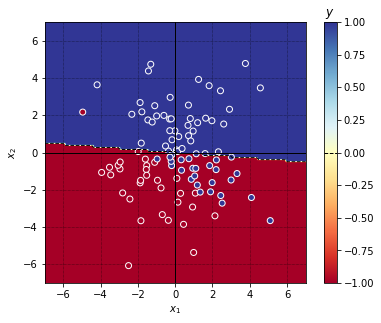

Perceptron dim = 2
- bias = 16.0
- weights = [0.5475736890608074, 7.453089374198232]


In [3]:
my_perceptron = model.Perceptron(dim=2)
my_perceptron.partial_fit(xs[:5], ys[:5])
data.scatter(xs, ys, model=my_perceptron)
print(my_perceptron)
print(f'- bias = {my_perceptron.bias}')
print(f'- weights = {my_perceptron.weights}')

Hoogstwaarschijnlijk zal er nog geen correcte grenslijn gevonden worden, maar het perceptron doet wel al een aantal juiste voorspellingen en je zou moeten kunnen zien dat de bias en gewichten zijn bijgewerkt.

Voeg tenslotte een methode `fit(self, xs, ys, *, epochs=0)` toe die meerdere epochs uitvoert, zoals opgegeven door de gebruiker. Maak hierbij gebruik van de eerdere `partial_fit()` functie om telkens één hele epoch te trainen. Zorg dat het perceptron automatisch stopt met het draaien van verdere epochs als er in de vorige epoch geen veranderingen in het model meer zijn aangebracht. Als de gebruiker om nul epochs verzoekt (of geen waarde meegeeft waardoor de default waarde `epochs=0` geldt), laat dan het algoritme zoveel epochs draaien als maar nodig zijn om te convergeren.

In [4]:
my_perceptron = model.Perceptron(dim=2)
my_perceptron.fit(xs, ys)
data.scatter(xs, ys, model=my_perceptron)
print(my_perceptron)
print(f'- bias = {my_perceptron.bias}')
print(f'- weights = {my_perceptron.weights}')

Epoch round: 1	Old: [0, 0]	New: [3.8324006063217047, 3.167391895928228]
Epoch round: 2	Old: [3.8324006063217047, 3.167391895928228]	New: [3.7284841150125674, 2.920092856289939]
Epoch round: 3	Old: [3.7284841150125674, 2.920092856289939]	New: [4.94249295941985, 4.556369956412861]
Epoch round: 4	Old: [4.94249295941985, 4.556369956412861]	New: [7.192256082612612, 3.992557402324535]
Epoch round: 5	Old: [7.192256082612612, 3.992557402324535]	New: [4.8974246267005075, 4.568073366347616]
Epoch round: 6	Old: [4.8974246267005075, 4.568073366347616]	New: [7.14718774989327, 4.004260812259292]
Epoch round: 7	Old: [7.14718774989327, 4.004260812259292]	New: [4.852356293981167, 4.579776776282373]
Epoch round: 8	Old: [4.852356293981167, 4.579776776282373]	New: [7.1021194171739275, 4.015964222194049]
Epoch round: 9	Old: [7.1021194171739275, 4.015964222194049]	New: [4.8072879612618244, 4.59148018621713]
Epoch round: 10	Old: [4.8072879612618244, 4.59148018621713]	New: [7.057051084454585, 4.02766763212880

Epoch round: 864	Old: [8.322692804992759, 7.8669055048475345]	New: [8.483363856352451, 8.140755016112323]
Epoch round: 865	Old: [8.483363856352451, 8.140755016112323]	New: [8.644034907712143, 8.414604527377112]
Epoch round: 866	Old: [8.644034907712143, 8.414604527377112]	New: [4.441825375577332, 6.817032940273617]
Epoch round: 867	Old: [4.441825375577332, 6.817032940273617]	New: [3.2624591938078344, 1.761883366258333]
Epoch round: 868	Old: [3.2624591938078344, 1.761883366258333]	New: [6.581312845492506, 7.330016307510621]
Epoch round: 869	Old: [6.581312845492506, 7.330016307510621]	New: [4.300092161200048, 4.426895540654457]
Epoch round: 870	Old: [4.300092161200048, 4.426895540654457]	New: [2.936745808855968, 1.431525692640224]
Epoch round: 871	Old: [2.936745808855968, 1.431525692640224]	New: [6.516852798289687, 3.59434391420994]
Epoch round: 872	Old: [6.516852798289687, 3.59434391420994]	New: [4.222021342377584, 4.16985987823302]
Epoch round: 873	Old: [4.222021342377584, 4.16985987823

Epoch round: 1459	Old: [4.928661158869675, 4.807353212578334]	New: [7.178424282062437, 4.243540658490007]
Epoch round: 1460	Old: [7.178424282062437, 4.243540658490007]	New: [4.883592826150334, 4.819056622513089]
Epoch round: 1461	Old: [4.883592826150334, 4.819056622513089]	New: [7.133355949343095, 4.255244068424764]
Epoch round: 1462	Old: [7.133355949343095, 4.255244068424764]	New: [4.838524493430992, 4.830760032447846]
Epoch round: 1463	Old: [4.838524493430992, 4.830760032447846]	New: [7.088287616623752, 4.266947478359521]
Epoch round: 1464	Old: [7.088287616623752, 4.266947478359521]	New: [6.34174724427156, 7.194473279794635]
Epoch round: 1465	Old: [6.34174724427156, 7.194473279794635]	New: [6.603522128803554, 3.824185068618581]
Epoch round: 1466	Old: [6.603522128803554, 3.824185068618581]	New: [4.308690672891451, 4.399701032641663]
Epoch round: 1467	Old: [4.308690672891451, 4.399701032641663]	New: [2.9453443205473713, 1.4043311846274298]
Epoch round: 1468	Old: [2.9453443205473713, 1.

Epoch round: 2110	Old: [2.8627297752808767, 1.4761053574222833]	New: [6.442836764714595, 3.6389235789919994]
Epoch round: 2111	Old: [6.442836764714595, 3.6389235789919994]	New: [4.148005308802492, 4.21443954301508]
Epoch round: 2112	Old: [4.148005308802492, 4.21443954301508]	New: [4.76016727031521, 7.209084056927003]
Epoch round: 2113	Old: [4.76016727031521, 7.209084056927003]	New: [3.5808010885457113, 2.153934482911719]
Epoch round: 2114	Old: [3.5808010885457113, 2.153934482911719]	New: [3.7069128668126217, 2.952199430501716]
Epoch round: 2115	Old: [3.7069128668126217, 2.952199430501716]	New: [4.920921711219904, 4.5884765306246384]
Epoch round: 2116	Old: [4.920921711219904, 4.5884765306246384]	New: [7.170684834412665, 4.024663976536313]
Epoch round: 2117	Old: [7.170684834412665, 4.024663976536313]	New: [4.875853378500562, 4.600179940559394]
Epoch round: 2118	Old: [4.875853378500562, 4.600179940559394]	New: [7.125616501693322, 4.03636738647107]
Epoch round: 2119	Old: [7.125616501693322

Epoch round: 2696	Old: [4.10866259462259, 3.5009756223944968]	New: [4.004746103313454, 3.2536765827562086]
Epoch round: 2697	Old: [4.004746103313454, 3.2536765827562086]	New: [3.9008296120043164, 3.006377543117919]
Epoch round: 2698	Old: [3.9008296120043164, 3.006377543117919]	New: [3.796913120695179, 2.75907850347963]
Epoch round: 2699	Old: [3.796913120695179, 2.75907850347963]	New: [5.010921965102462, 4.395355603602552]
Epoch round: 2700	Old: [5.010921965102462, 4.395355603602552]	New: [8.167805734144633, 7.836669162784985]
Epoch round: 2701	Old: [8.167805734144633, 7.836669162784985]	New: [8.328476785504325, 8.110518674049771]
Epoch round: 2702	Old: [8.328476785504325, 8.110518674049771]	New: [8.489147836864017, 8.38436818531456]
Epoch round: 2703	Old: [8.489147836864017, 8.38436818531456]	New: [4.286938304729206, 6.786796598211066]
Epoch round: 2704	Old: [4.286938304729206, 6.786796598211066]	New: [3.1075721229597084, 1.731647024195782]
Epoch round: 2705	Old: [3.1075721229597084, 1

Epoch round: 3353	Old: [6.0050805547704735, 7.200886568136954]	New: [3.785258107101545, 2.846518735972209]
Epoch round: 3354	Old: [3.785258107101545, 2.846518735972209]	New: [4.999266951508828, 4.482795836095131]
Epoch round: 3355	Old: [4.999266951508828, 4.482795836095131]	New: [6.117517931365672, 2.4715056090695873]
Epoch round: 3356	Old: [6.117517931365672, 2.4715056090695873]	New: [3.6606482380259218, 4.0768067015047835]
Epoch round: 3357	Old: [3.6606482380259218, 4.0768067015047835]	New: [4.574007016373795, 4.5393549431466385]
Epoch round: 3358	Old: [4.574007016373795, 4.5393549431466385]	New: [3.2106606640297164, 1.5439850951324052]
Epoch round: 3359	Old: [3.2106606640297164, 1.5439850951324052]	New: [6.790767653463437, 3.7068033167021213]
Epoch round: 3360	Old: [6.790767653463437, 3.7068033167021213]	New: [4.495936197551334, 4.2823192807252015]
Epoch round: 3361	Old: [4.495936197551334, 4.2823192807252015]	New: [3.1325898452072556, 1.2869494327109683]
Epoch round: 3362	Old: [3.1

Epoch round: 3840	Old: [4.400706071863761, 3.9090949287548837]	New: [4.369998155382299, 6.67662912240906]
Epoch round: 3841	Old: [4.369998155382299, 6.67662912240906]	New: [3.1906319736128017, 1.6214795483937756]
Epoch round: 3842	Old: [3.1906319736128017, 1.6214795483937756]	New: [4.9611945417375605, 4.837602652234028]
Epoch round: 3843	Old: [4.9611945417375605, 4.837602652234028]	New: [7.210957664930323, 4.273790098145701]
Epoch round: 3844	Old: [7.210957664930323, 4.273790098145701]	New: [4.916126209018218, 4.849306062168783]
Epoch round: 3845	Old: [4.916126209018218, 4.849306062168783]	New: [7.1658893322109805, 4.285493508080458]
Epoch round: 3846	Old: [7.1658893322109805, 4.285493508080458]	New: [4.871057876298877, 4.86100947210354]
Epoch round: 3847	Old: [4.871057876298877, 4.86100947210354]	New: [7.120820999491638, 4.297196918015215]
Epoch round: 3848	Old: [7.120820999491638, 4.297196918015215]	New: [6.374280627139446, 7.224722719450329]
Epoch round: 3849	Old: [6.374280627139446

Epoch round: 4398	Old: [8.361781051907837, 7.884137086171035]	New: [8.522452103267529, 8.157986597435823]
Epoch round: 4399	Old: [8.522452103267529, 8.157986597435823]	New: [8.683123154627221, 8.431836108700612]
Epoch round: 4400	Old: [8.683123154627221, 8.431836108700612]	New: [4.480913622492409, 6.834264521597118]
Epoch round: 4401	Old: [4.480913622492409, 6.834264521597118]	New: [3.301547440722911, 1.7791149475818333]
Epoch round: 4402	Old: [3.301547440722911, 1.7791149475818333]	New: [2.9722133703214713, 1.3963444236328444]
Epoch round: 4403	Old: [2.9722133703214713, 1.3963444236328444]	New: [6.552320359755189, 3.5591626452025587]
Epoch round: 4404	Old: [6.552320359755189, 3.5591626452025587]	New: [4.257488903843086, 4.134678609225639]
Epoch round: 4405	Old: [4.257488903843086, 4.134678609225639]	New: [7.414372672885254, 7.5759921684080735]
Epoch round: 4406	Old: [7.414372672885254, 7.5759921684080735]	New: [5.133151988592795, 4.67287140155191]
Epoch round: 4407	Old: [5.13315198859

Epoch round: 5067	Old: [3.135459117630428, 1.9988297659521752]	New: [2.756691060644438, 2.4721109419209673]
Epoch round: 5068	Old: [2.756691060644438, 2.4721109419209673]	New: [3.7835528254574182, 3.3528590636148397]
Epoch round: 5069	Old: [3.7835528254574182, 3.3528590636148397]	New: [3.679636334148281, 3.1055600239765493]
Epoch round: 5070	Old: [3.679636334148281, 3.1055600239765493]	New: [3.5757198428391437, 2.8582609843382603]
Epoch round: 5071	Old: [3.5757198428391437, 2.8582609843382603]	New: [4.834875201419847, 7.403385933654801]
Epoch round: 5072	Old: [4.834875201419847, 7.403385933654801]	New: [3.6555090196503484, 2.3482363596395164]
Epoch round: 5073	Old: [3.6555090196503484, 2.3482363596395164]	New: [4.212162703629151, 4.472554090326516]
Epoch round: 5074	Old: [4.212162703629151, 4.472554090326516]	New: [2.8488163512850706, 1.4771842423122825]
Epoch round: 5075	Old: [2.8488163512850706, 1.4771842423122825]	New: [3.9473260085178676, 2.6559228428933075]
Epoch round: 5076	Old: 

Epoch round: 5640	Old: [4.2978859892395, 4.168476571828628]	New: [7.454769758281668, 7.609790131011063]
Epoch round: 5641	Old: [7.454769758281668, 7.609790131011063]	New: [5.173549073989209, 4.706669364154899]
Epoch round: 5642	Old: [5.173549073989209, 4.706669364154899]	New: [3.4666323562488115, 3.821600584958316]
Epoch round: 5643	Old: [3.4666323562488115, 3.821600584958316]	New: [4.379991134596684, 4.284148826600171]
Epoch round: 5644	Old: [4.379991134596684, 4.284148826600171]	New: [3.0166447822526044, 1.2887789785859374]
Epoch round: 5645	Old: [3.0166447822526044, 1.2887789785859374]	New: [6.596751771686323, 3.4515972001556534]
Epoch round: 5646	Old: [6.596751771686323, 3.4515972001556534]	New: [4.30192031577422, 4.027113164178734]
Epoch round: 5647	Old: [4.30192031577422, 4.027113164178734]	New: [5.9105130012564775, 5.116416885949135]
Epoch round: 5648	Old: [5.9105130012564775, 5.116416885949135]	New: [6.442809909521657, 4.582307330002155]
Epoch round: 5649	Old: [6.44280990952165

Epoch round: 6183	Old: [7.908892251764809, 7.770497794728995]	New: [5.627671567472353, 4.867377027872831]
Epoch round: 6184	Old: [5.627671567472353, 4.867377027872831]	New: [7.161602234794387, 4.463556081565445]
Epoch round: 6185	Old: [7.161602234794387, 4.463556081565445]	New: [6.374984995823675, 8.471107144311151]
Epoch round: 6186	Old: [6.374984995823675, 8.471107144311151]	New: [7.4238570485687365, 5.165256157934123]
Epoch round: 6187	Old: [7.4238570485687365, 5.165256157934123]	New: [5.508942692618093, 7.4929705657810475]
Epoch round: 6188	Old: [5.508942692618093, 7.4929705657810475]	New: [6.811173843049518, 3.4219006127544542]
Epoch round: 6189	Old: [6.811173843049518, 3.4219006127544542]	New: [4.516342387137415, 3.9974165767775367]
Epoch round: 6190	Old: [4.516342387137415, 3.9974165767775367]	New: [4.485634470655953, 6.764950770431713]
Epoch round: 6191	Old: [4.485634470655953, 6.764950770431713]	New: [3.3062682888864563, 1.7098011964164286]
Epoch round: 6192	Old: [3.3062682888

Epoch round: 6727	Old: [4.712362187907868, 4.7779143351095295]	New: [6.962125311100628, 4.2141017810212045]
Epoch round: 6728	Old: [6.962125311100628, 4.2141017810212045]	New: [4.667293855188525, 4.7896177450442865]
Epoch round: 6729	Old: [4.667293855188525, 4.7896177450442865]	New: [6.917056978381286, 4.2258051909559615]
Epoch round: 6730	Old: [6.917056978381286, 4.2258051909559615]	New: [6.170516606029094, 7.1533309923910755]
Epoch round: 6731	Old: [6.170516606029094, 7.1533309923910755]	New: [3.9506941583601654, 2.7989631602263305]
Epoch round: 6732	Old: [3.9506941583601654, 2.7989631602263305]	New: [5.164703002767448, 4.435240260349253]
Epoch round: 6733	Old: [5.164703002767448, 4.435240260349253]	New: [8.321586771809617, 7.876553819531684]
Epoch round: 6734	Old: [8.321586771809617, 7.876553819531684]	New: [8.48225782316931, 8.150403330796472]
Epoch round: 6735	Old: [8.48225782316931, 8.150403330796472]	New: [8.642928874529002, 8.42425284206126]
Epoch round: 6736	Old: [8.6429288745

Epoch round: 7465	Old: [5.131921650284012, 4.693494558037796]	New: [3.4250049325436143, 3.808425778841213]
Epoch round: 7466	Old: [3.4250049325436143, 3.808425778841213]	New: [4.338363710891487, 4.2709740204830675]
Epoch round: 7467	Old: [4.338363710891487, 4.2709740204830675]	New: [2.975017358547407, 1.2756041724688343]
Epoch round: 7468	Old: [2.975017358547407, 1.2756041724688343]	New: [6.555124347981126, 3.4384223940385503]
Epoch round: 7469	Old: [6.555124347981126, 3.4384223940385503]	New: [4.260292892069023, 4.013938358061631]
Epoch round: 7470	Old: [4.260292892069023, 4.013938358061631]	New: [5.86888557755128, 5.1032420798320315]
Epoch round: 7471	Old: [5.86888557755128, 5.1032420798320315]	New: [6.401182485816459, 4.5691325238850515]
Epoch round: 7472	Old: [6.401182485816459, 4.5691325238850515]	New: [4.486268129865812, 6.896846931731976]
Epoch round: 7473	Old: [4.486268129865812, 6.896846931731976]	New: [3.3069019480963133, 1.8416973577166917]
Epoch round: 7474	Old: [3.30690194

Epoch round: 8144	Old: [4.224209625199835, 4.00375009399215]	New: [5.8328023106820925, 5.093053815762551]
Epoch round: 8145	Old: [5.8328023106820925, 5.093053815762551]	New: [6.365099218947272, 4.558944259815571]
Epoch round: 8146	Old: [6.365099218947272, 4.558944259815571]	New: [4.450184862996626, 6.886658667662496]
Epoch round: 8147	Old: [4.450184862996626, 6.886658667662496]	New: [3.270818681227129, 1.8315090936472114]
Epoch round: 8148	Old: [3.270818681227129, 1.8315090936472114]	New: [2.892050624241139, 2.3047902696160034]
Epoch round: 8149	Old: [2.892050624241139, 2.3047902696160034]	New: [4.443810924655738, 3.2962835212433474]
Epoch round: 8150	Old: [4.443810924655738, 3.2962835212433474]	New: [6.821491765547524, 4.03306410259375]
Epoch round: 8151	Old: [6.821491765547524, 4.03306410259375]	New: [4.526660309635421, 4.608580066616832]
Epoch round: 8152	Old: [4.526660309635421, 4.608580066616832]	New: [6.776423432828183, 4.044767512528507]
Epoch round: 8153	Old: [6.776423432828183

Epoch round: 8775	Old: [2.957167610651333, 1.4210051487311466]	New: [6.537274600085052, 3.5838233703008626]
Epoch round: 8776	Old: [6.537274600085052, 3.5838233703008626]	New: [4.242443144172949, 4.159339334323943]
Epoch round: 8777	Old: [4.242443144172949, 4.159339334323943]	New: [7.399326913215117, 7.6006528935063775]
Epoch round: 8778	Old: [7.399326913215117, 7.6006528935063775]	New: [5.118106228922658, 4.697532126650214]
Epoch round: 8779	Old: [5.118106228922658, 4.697532126650214]	New: [3.4111895111822603, 3.812463347453631]
Epoch round: 8780	Old: [3.4111895111822603, 3.812463347453631]	New: [4.324548289530133, 4.275011589095485]
Epoch round: 8781	Old: [4.324548289530133, 4.275011589095485]	New: [2.961201937186053, 1.2796417410812522]
Epoch round: 8782	Old: [2.961201937186053, 1.2796417410812522]	New: [6.541308926619772, 3.442459962650968]
Epoch round: 8783	Old: [6.541308926619772, 3.442459962650968]	New: [4.246477470707669, 4.0179759266740485]
Epoch round: 8784	Old: [4.2464774707

Epoch round: 9366	Old: [5.967168440542148, 5.087898882707523]	New: [6.499465348807327, 4.553789326760543]
Epoch round: 9367	Old: [6.499465348807327, 4.553789326760543]	New: [4.58455099285668, 6.881503734607468]
Epoch round: 9368	Old: [4.58455099285668, 6.881503734607468]	New: [3.4051848110871807, 1.8263541605921834]
Epoch round: 9369	Old: [3.4051848110871807, 1.8263541605921834]	New: [3.075850740685741, 1.4435836366431944]
Epoch round: 9370	Old: [3.075850740685741, 1.4435836366431944]	New: [6.655957730119461, 3.6064018582129087]
Epoch round: 9371	Old: [6.655957730119461, 3.6064018582129087]	New: [4.361126274207358, 4.181917822235989]
Epoch round: 9372	Old: [4.361126274207358, 4.181917822235989]	New: [7.518010043249526, 7.623231381418424]
Epoch round: 9373	Old: [7.518010043249526, 7.623231381418424]	New: [5.236789358957067, 4.72011061456226]
Epoch round: 9374	Old: [5.236789358957067, 4.72011061456226]	New: [3.529872641216669, 3.835041835365677]
Epoch round: 9375	Old: [3.529872641216669,

Epoch round: 9957	Old: [7.191153317561088, 4.023721966720998]	New: [4.896321861648984, 4.599237930744079]
Epoch round: 9958	Old: [4.896321861648984, 4.599237930744079]	New: [7.146084984841746, 4.035425376655755]
Epoch round: 9959	Old: [7.146084984841746, 4.035425376655755]	New: [4.851253528929643, 4.610941340678836]
Epoch round: 9960	Old: [4.851253528929643, 4.610941340678836]	New: [7.101016652122404, 4.047128786590511]
Epoch round: 9961	Old: [7.101016652122404, 4.047128786590511]	New: [4.806185196210301, 4.622644750613593]
Epoch round: 9962	Old: [4.806185196210301, 4.622644750613593]	New: [7.055948319403061, 4.058832196525268]
Epoch round: 9963	Old: [7.055948319403061, 4.058832196525268]	New: [4.761116863490958, 4.63434816054835]
Epoch round: 9964	Old: [4.761116863490958, 4.63434816054835]	New: [7.010879986683719, 4.070535606460025]
Epoch round: 9965	Old: [7.010879986683719, 4.070535606460025]	New: [4.716048530771616, 4.646051570483107]
Epoch round: 9966	Old: [4.716048530771616, 4.646

Epoch round: 10486	Old: [6.7064185724351155, 4.641905879280546]	New: [4.791504216484468, 6.96962028712747]
Epoch round: 10487	Old: [4.791504216484468, 6.96962028712747]	New: [3.6121380347149694, 1.9144707131121859]
Epoch round: 10488	Old: [3.6121380347149694, 1.9144707131121859]	New: [3.346183305978184, 2.696956801886013]
Epoch round: 10489	Old: [3.346183305978184, 2.696956801886013]	New: [4.6053386645588885, 7.242081751202552]
Epoch round: 10490	Old: [4.6053386645588885, 7.242081751202552]	New: [3.4259724827893896, 2.186932177187268]
Epoch round: 10491	Old: [3.4259724827893896, 2.186932177187268]	New: [3.0271857254546815, 2.874451994843793]
Epoch round: 10492	Old: [3.0271857254546815, 2.874451994843793]	New: [4.054047490267662, 3.7552001165376683]
Epoch round: 10493	Old: [4.054047490267662, 3.7552001165376683]	New: [4.0233395737862, 6.522734310191843]
Epoch round: 10494	Old: [4.0233395737862, 6.522734310191843]	New: [2.8439733920167027, 1.4675847361765584]
Epoch round: 10495	Old: [2.8

Epoch round: 11048	Old: [6.585584710176329, 3.626677200267512]	New: [4.290753254264226, 4.202193164290592]
Epoch round: 11049	Old: [4.290753254264226, 4.202193164290592]	New: [4.902915215776944, 7.196837678202516]
Epoch round: 11050	Old: [4.902915215776944, 7.196837678202516]	New: [3.723549034007447, 2.1416881041872315]
Epoch round: 11051	Old: [3.723549034007447, 2.1416881041872315]	New: [3.4575943052706615, 2.9241741929610585]
Epoch round: 11052	Old: [3.4575943052706615, 2.9241741929610585]	New: [6.892421490151936, 3.731511081900658]
Epoch round: 11053	Old: [6.892421490151936, 3.731511081900658]	New: [4.597590034239833, 4.30702704592374]
Epoch round: 11054	Old: [4.597590034239833, 4.30702704592374]	New: [4.072537615394907, 4.8843840146300845]
Epoch round: 11055	Old: [4.072537615394907, 4.8843840146300845]	New: [5.470526630376771, 4.46088138875196]
Epoch round: 11056	Old: [5.470526630376771, 4.46088138875196]	New: [7.004457297698803, 4.0570604424445715]
Epoch round: 11057	Old: [7.00445

Epoch round: 11621	Old: [3.176594997324659, 1.6144240797397131]	New: [4.947157565449418, 4.830547183579966]
Epoch round: 11622	Old: [4.947157565449418, 4.830547183579966]	New: [7.19692068864218, 4.266734629491639]
Epoch round: 11623	Old: [7.19692068864218, 4.266734629491639]	New: [4.902089232730075, 4.842250593514721]
Epoch round: 11624	Old: [4.902089232730075, 4.842250593514721]	New: [7.151852355922838, 4.278438039426396]
Epoch round: 11625	Old: [7.151852355922838, 4.278438039426396]	New: [4.857020900010735, 4.853954003449478]
Epoch round: 11626	Old: [4.857020900010735, 4.853954003449478]	New: [7.106784023203495, 4.290141449361153]
Epoch round: 11627	Old: [7.106784023203495, 4.290141449361153]	New: [6.360243650851303, 7.217667250796267]
Epoch round: 11628	Old: [6.360243650851303, 7.217667250796267]	New: [6.622018535383297, 3.847379039620213]
Epoch round: 11629	Old: [6.622018535383297, 3.847379039620213]	New: [4.327187079471194, 4.422895003643295]
Epoch round: 11630	Old: [4.32718707947

Epoch round: 12153	Old: [4.801321847769532, 7.308560966861385]	New: [3.6219556660000327, 2.2534113928461004]
Epoch round: 12154	Old: [3.6219556660000327, 2.2534113928461004]	New: [4.178609349978835, 4.3777291235331]
Epoch round: 12155	Old: [4.178609349978835, 4.3777291235331]	New: [2.815262997634755, 1.3823592755188647]
Epoch round: 12156	Old: [2.815262997634755, 1.3823592755188647]	New: [3.913772654867552, 2.5610978760998897]
Epoch round: 12157	Old: [3.913772654867552, 2.5610978760998897]	New: [3.6478179261307657, 3.3435839648737162]
Epoch round: 12158	Old: [3.6478179261307657, 3.3435839648737162]	New: [4.561176704478639, 3.8061322065155685]
Epoch round: 12159	Old: [4.561176704478639, 3.8061322065155685]	New: [6.938857545370425, 4.542912787865971]
Epoch round: 12160	Old: [6.938857545370425, 4.542912787865971]	New: [5.023943189419778, 6.870627195712896]
Epoch round: 12161	Old: [5.023943189419778, 6.870627195712896]	New: [6.326174339851201, 2.799557242686303]
Epoch round: 12162	Old: [6.

Epoch round: 12760	Old: [4.4390316496935665, 4.702184139545751]	New: [6.688794772886329, 4.138371585457426]
Epoch round: 12761	Old: [6.688794772886329, 4.138371585457426]	New: [4.393963316974226, 4.713887549480508]
Epoch round: 12762	Old: [4.393963316974226, 4.713887549480508]	New: [7.075758219785737, 3.761619529732908]
Epoch round: 12763	Old: [7.075758219785737, 3.761619529732908]	New: [4.780926763873634, 4.337135493755988]
Epoch round: 12764	Old: [4.780926763873634, 4.337135493755988]	New: [7.9378105329158055, 7.778449052938423]
Epoch round: 12765	Old: [7.9378105329158055, 7.778449052938423]	New: [5.65658984862335, 4.875328286082259]
Epoch round: 12766	Old: [5.65658984862335, 4.875328286082259]	New: [7.1905205159453836, 4.471507339774872]
Epoch round: 12767	Old: [7.1905205159453836, 4.471507339774872]	New: [6.403903276974671, 8.479058402520579]
Epoch round: 12768	Old: [6.403903276974671, 8.479058402520579]	New: [7.452775329719733, 5.17320741614355]
Epoch round: 12769	Old: [7.45277532

KeyboardInterrupt: 

Rosenblatt heeft bewezen dat het perceptron algoritme gegarandeerd in een eindig aantal stappen convergeert naar een oplossing die alle instances juist classificeert als de data lineair separabel zijn. Dat is hier het geval. Als je dit juist implementeert zou de bovenstaande code daarom een lijn moeten vinden die de beide klassen perfect van elkaar weet te scheiden.

Hieronder worden de eerste vijf instances in een tabel getoond; ga na dat de voorspelling $\hat{y}$ telkens gelijk is aan het echte klasselabel $y$.

In [ ]:
yhats = my_perceptron.predict(xs)
DataFrame(xs, columns=['x1', 'x2']).assign(y=ys, ŷ=yhats).head()

<div class="alert alert-success">**Gefeliciteerd!**<br />Je hebt nu zelf een algoritme geïmplementeerd dat een lineair separabele verzameling trainingsdata perfect kan leren onderscheiden.</div>

Ter vergelijking tonen we hieronder het perceptron zoals dit in de machine-learning module [scikit-learn](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Perceptron.html) reeds beschikbaar is. De syntax van deze class is zeer vergelijkbaar met de onze, hoewel de bias en coefficienten beschikbaar zijn in de `intercept_` en `coef_` variabelen, en een parameter `max_iter` het gewenste (maximum) aantal epochs aangeeft.

Ziet de oplossing er hetzelfde uit als voor je eigen model? Ga na dat de waarden van de bias en de gewichten niet van dezelfde grootten zijn. Begrijp je hoe dit toch ogenschijnlijk hetzelfde model kan opleveren?

In [ ]:
skl_perceptron = linear_model.Perceptron(max_iter=1000)
skl_perceptron.fit(xs, ys)
data.scatter(xs, ys, model=skl_perceptron)
print(skl_perceptron)
print(f'- bias = {skl_perceptron.intercept_[0]}')
print(f'- weights = {skl_perceptron.coef_[0]}')

### <a id='Lineaire_regressie'>Lineaire regressie</a>

Vervolgens doen we hetzelfde met instances die een getalwaarde als te voorspellen uitkomst hebben. Eerst maar weer eens een kijkje nemen naar de data. De uitkomsten $y$ zijn nu numeriek.

In [ ]:
xs, ys = data.linear('numeric')
DataFrame(xs, columns=['x1', 'x2']).assign(y=ys).head()

De instances worden nu gekleurd langs het hele bereik van de kleurschaal. De ligging van de verschillende kleuren in het scatterplot vormt een zichtbare geleidelijke overgang van rood via geel naar blauw.

In [ ]:
data.scatter(xs, ys)

Kopieer de code van het perceptron om een nieuwe class `LinearRegression()` toe te voegen aan hetzelfde bestand `model.py` en pas de initialisatie-, representatie- en predictie-methoden aan. Het model voor lineaire regressie luidt:

$$
\hat{y}=b+\sum_{i}w_{i}\cdot x_{i}
$$

De methode `predict(self, xs)` dient in dit geval een lijst met getalwaarden te retourneren i.p.v. een lijst met klasselabels.

Een ongetraind model zou wederom uitkomsten gelijk aan nul moeten voorspellen. Controleer dat je geen foutmeldingen krijgt.

In [ ]:
my_linearregression = model.LinearRegression(dim=2)
yhats = my_linearregression.predict(xs)
DataFrame(xs, columns=['x1', 'x2']).assign(y=ys, ŷ=yhats).head()

Vervolgens gaan we het lineaire regressiemodel trainen, eerst weer op grond van de eerste vijf instances met de update-regel:

$$
\left\{ \begin{array}{c}
b\leftarrow b-\alpha\left(\hat{y}-y\right)\\
w_{i}\leftarrow w_{i}-\alpha\left(\hat{y}-y\right)x_{i}
\end{array}\right.
$$

De methode `partial_fit(self, xs, ys, *, alpha=...)` krijgt nu een extra parameter, de learning rate $\alpha$. Geef deze een geschikte default waarde.

In [ ]:
my_linearregression = model.LinearRegression(dim=2)
my_linearregression.partial_fit(xs[:5], ys[:5])
data.scatter(xs, ys, model=my_linearregression)
print(my_linearregression)
print(f'- bias = {my_linearregression.bias}')
print(f'- weights = {my_linearregression.weights}')

Na het trainen met enkele instances zou er al een zwakke gradiënt in de achtergrond zichtbaar kunnen worden. De diagonale stippellijn geeft hierboven aan waar de voorspelling $\hat{y}=0$; deze scheidt dus de instances met een voorspelde positieve uitkomst van die met een voorspelde negatieve uitkomst.

Voeg nu tenslotte weer de methode `fit(self, xs, ys, *, alpha=..., epochs=...)` toe die training toepast op een gegeven aantal hele epochs. Pas de default waarde voor de learning rate weer aan, in overeenstemming met de functie `partial_fit()`. In tegenstelling tot bij het perceptron kan het aantal epochs nu niet default op nul worden gesteld, met als betekenis dat het algoritme door dient te itereren tot alle instances juist geclassificeerd zijn. Immers, het lineaire regressie model convergeert meestal niet in een eindig aantal stappen naar een exacte uitkomst. Wel wordt er bij een juiste keuze van $\alpha$ geleidelijk een steeds betere benadering gevonden. Vandaar dat we hier standaard een redelijk groot aantal epochs willen uitvoeren. Kies wederom zelf een geschikte default waarde.

Draai de code hieronder. Slaagt je model erin om te convergeren naar een uitkomst die de echte getalwaarden van de instances ogenschijnlijk goed voorspelt? Hoe kun je dit zien?

In [ ]:
my_linearregression = model.LinearRegression(dim=2)
my_linearregression.fit(xs, ys)
data.scatter(xs, ys, model=my_linearregression)
print(my_linearregression)
print(f'- bias = {my_linearregression.bias}')
print(f'- weights = {my_linearregression.weights}')

Controleer hieronder dat de voorspellingen inderdaad goed overeen komen met de gewenste waarden.

In [ ]:
yhats = my_linearregression.predict(xs)
DataFrame(xs, columns=['x1', 'x2']).assign(y=ys, ŷ=yhats).head()

<div class="alert alert-success">**Gefeliciteerd!**<br />Je hebt nu ook een algoritme geïmplementeerd dat lineaire regressie kan uitvoeren.</div>

Ter vergelijking tonen we hieronder ook het lineaire regressiemodel uit de machine-learning module [scikit-learn](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html). Bekijk de syntax van deze functie. De bias en coefficienten zijn opnieuw toegankelijk via de `intercept_` en `coef_` variabelen.

Ziet de oplossing er dit keer hetzelfde uit als voor je eigen model? Zijn de waarden van de bias en de gewichten nu wel van vergelijkbare grootten?

In [ ]:
skl_linearregression = linear_model.LinearRegression()
skl_linearregression.fit(xs, ys)
data.scatter(xs, ys, model=skl_linearregression)
print(skl_linearregression)
print(f'- bias = {skl_linearregression.intercept_}')
print(f'- weights = {skl_linearregression.coef_}')

***

<small>&copy; 2022, Dave R.M. Langers, [d.r.m.langers@pl.hanze.nl](mailto:d.r.m.langers@pl.hanze.nl)</small>